In [85]:
!pip3 install xgboost
!pip3 install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 10.1 MB/s  0:00:00

   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



In [86]:
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder

from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from xgboost import XGBClassifier
import shap

In [87]:
df = pd.read_csv('smart_manufacturing_dataset.csv')
df

,Machine_ID,Temperature (°C),Pressure (bar),Speed (RPM),Material Flow (kg/s),Kp,Ki,Kd,FLBC Output,System Oscillation (%),Predictive Maintenance Score,Equipment Health Index,Unplanned Downtime (min),Resource Utilization (%),Production Throughput (units/hr),Energy Consumption (kWh),System Response Time (ms),Error Rate (%),System_Status
0,51,77.801575,2.360237,1817,13.592311,0.792724,0.016974,0.833259,1.955414,3.240934,0.885726,70,6,89.872797,137,51.174468,17,2.630056,Stable
1,19,80.228293,2.169353,1812,17.666703,0.834704,0.013047,0.855296,1.141837,3.112403,0.812176,86,6,94.981527,134,49.517434,12,2.950280,Needs Maintenance
2,11,62.477215,1.967572,1478,19.159320,0.897438,0.032583,0.708850,1.070753,3.026675,0.805276,88,4,91.556379,121,45.331321,14,0.754831,Unstable
3,69,70.926243,1.930538,1884,12.067816,1.195431,0.017248,0.272843,1.251100,2.854789,0.794163,77,8,91.382113,140,49.387888,19,3.738926,Stable
4,53,84.389912,2.416507,1859,12.759283,1.404962,0.042714,0.477013,1.807739,3.069171,0.630284,82,7,90.929294,108,44.672495,21,1.106363,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,92,87.826247,2.953865,1400,11.266211,0.869753,0.039542,0.435133,1.574703,3.246680,0.635329,86,8,89.824990,124,42.395568,25,3.935028,Stable
3419,71,67.925234,2.149206,1305,12.134493,1.434605,0.041864,0.244533,1.998943,4.084780,0.648080,75,2,94.001791,123,44.448923,26,3.817058,Stable
3420,34,59.560706,2.705525,1465,10.340979,1.262707,0.011334,0.564240,1.150965,4.470723,0.694098,74,3,89.879877,89,49.622887,13,1.452882,Unstable
3421,17,79.459768,3.350659,1623,12.130131,0.603749,0.023736,0.796738,1.626077,3.247386,0.889426,74,5,85.312501,95,44.209657,11,4.911449,Stable


In [88]:
df = df.sort_values(by=["Machine_ID"])

In [89]:
df.columns

Index(['Machine_ID', 'Temperature (°C)', 'Pressure (bar)', 'Speed (RPM)',
       'Material Flow (kg/s)', 'Kp', 'Ki', 'Kd', 'FLBC Output',
       'System Oscillation (%)', 'Predictive Maintenance Score',
       'Equipment Health Index', 'Unplanned Downtime (min)',
       'Resource Utilization (%)', 'Production Throughput (units/hr)',
       'Energy Consumption (kWh)', 'System Response Time (ms)',
       'Error Rate (%)', 'System_Status'],
      dtype='object')

In [90]:
Counter(df['System_Status'])

Counter({'Needs Maintenance': 1141, 'Unstable': 1141, 'Stable': 1141})

In [91]:
# There are 1 to 99 machine, split dataset into train/test via the machine ID
list(set(df['Machine_ID'].tolist()))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [92]:
# train_df = df[df["machine_id"].between(1, 80)]
# test_df  = df[df["machine_id"].between(81, 99)]

# target_col = "System_Status"

# X_train = train_df.drop(columns=[target_col, "Machine_ID", 'Error Rate (%)'])
# y_train = train_df[target_col]

# X_test = test_df.drop(columns=[target_col, "Machine_ID", 'Error Rate (%)'])
# y_test = test_df[target_col]

# le = LabelEncoder()

# y_train = le.fit_transform(y_train)
# y_test  = le.transform(y_test)

In [93]:
target_col = "System_Status"
columns = [
    target_col, 
    "Machine_ID", 
    # 'Error Rate (%)'
    ]

X = df.drop(columns=columns, errors="ignore")
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # IMPORTANT for 3-class
)

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

In [94]:
# model = Pipeline([
#     ("scaler", StandardScaler()),
#     ("clf", RandomForestClassifier(
#         n_estimators=300,
#         random_state=42,
#         class_weight="balanced"
#     ))
# ])

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(
        objective="multi:softmax",
        num_class=3,
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="mlogloss",
        random_state=42
    ))
])

In [95]:
model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None


In [96]:
y_pred = model.predict(X_test)

In [97]:
f1_macro = f1_score(y_test, y_pred, average="macro")
f1_micro = f1_score(y_test, y_pred, average="micro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("F1 macro   :", f1_macro)
print("F1 micro   :", f1_micro)
print("F1 weighted:", f1_weighted)

F1 macro   : 0.3443783118577954
F1 micro   : 0.3445255474452555
F1 weighted: 0.3443643602033627


In [98]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84 72 72]
 [79 77 72]
 [73 81 75]]


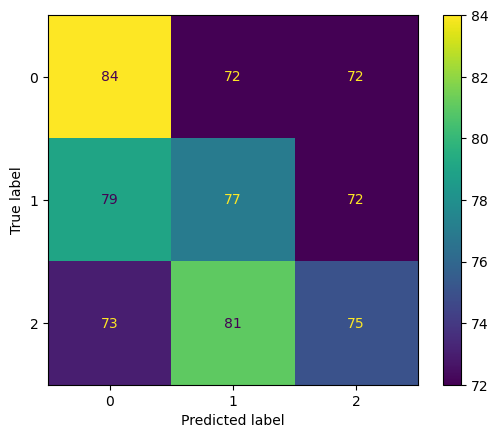

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [100]:
from sklearn.decomposition import PCA


In [101]:
# =========================
# 6. SHAP Feature Explanation
# =========================
feature_names = X.columns.to_list()

scaler = model.named_steps["scaler"]
xgb_model = model.named_steps["clf"]

X_test_scaled = scaler.transform(X_test)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

# Global explanation (class 0)
shap.summary_plot(
    shap_values[0],
    X_test_scaled,
    feature_names=feature_names,
    show=True
)

# Mean absolute SHAP (ranking)
mean_shap = np.abs(shap_values[0]).mean(axis=0)
shap_df = (
    pd.DataFrame({
        "feature": feature_names,
        "mean_abs_shap": mean_shap
    })
    .sort_values("mean_abs_shap", ascending=False)
)

print(shap_df.head(15))


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

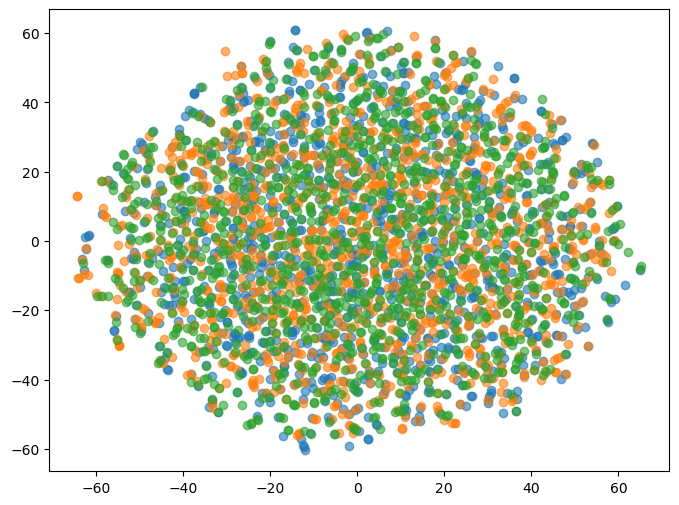

In [103]:
# =========================
# 7. t-SNE Visualization
# =========================
# Scale full dataset
X_scaled = scaler.transform(X)

# PCA before t-SNE (recommended)
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame({
    "tsne_1": X_tsne[:, 0],
    "tsne_2": X_tsne[:, 1],
    "label": y_enc
})

plt.figure(figsize=(8, 6))
for i, label in enumerate(le.classes_):
    subset = tsne_df[tsne_df["label"] == i]
    plt.scatter(
        subset["tsne_1"],
        subset["tsne_2"],
        label=label,
        alpha=0.6
    )